In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
listings = pd.read_excel(r"C:\Users\akshayk\Downloads\Listings Data.xlsx")


In [3]:
listings.describe()

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,1.518100e+04,1.518100e+04,1.518100e+04,11535.000000,0.0,15178.000000,15178.000000,0.0,15181.000000,15181.000000,...,12864.000000,12844.000000,12847.000000,12829.000000,12850.000000,12830.000000,12829.000000,0.0,15181.000000,13001.000000
mean,9.733629e+06,2.017040e+13,3.106406e+07,0.944733,NaN,3.404994,3.404994,NaN,52.365353,4.889025,...,93.903762,9.599346,9.417452,9.697872,9.743502,9.380281,9.172500,NaN,2.934787,1.211981
std,5.366683e+06,0.000000e+00,3.166049e+07,0.141310,NaN,11.324173,11.324173,NaN,0.015738,0.034901,...,6.937112,0.745629,0.904871,0.681219,0.635829,0.773500,0.831879,NaN,8.968696,1.342843
min,2.818000e+03,2.017040e+13,3.159000e+03,0.000000,NaN,0.000000,0.000000,NaN,52.290308,4.753513,...,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.020000
25%,5.117824e+06,2.017040e+13,6.701188e+06,0.970000,NaN,1.000000,1.000000,NaN,52.355616,4.865016,...,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.340000
50%,1.008104e+07,2.017040e+13,1.807277e+07,1.000000,NaN,1.000000,1.000000,NaN,52.365028,4.886344,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,1.000000,0.750000
75%,1.431790e+07,2.017040e+13,4.714416e+07,1.000000,NaN,1.000000,1.000000,NaN,52.374829,4.907857,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.500000
max,1.801401e+07,2.017040e+13,1.238477e+08,1.000000,NaN,106.000000,106.000000,NaN,52.426224,5.027689,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,91.000000,12.650000


In [4]:
# removing unwanted columns after manually analysing the dataset rather than making a large 
# correlation matrix . These variables does not affects the price and with reducing the nymber of features , the model will
# be less complex and predict better.

original_dataset = listings.copy()
not_needed = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_location',
       'host_about',  'host_response_rate',
       'host_acceptance_rate', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 
        'host_has_profile_pic',
        'market', 'smart_location', 'country_code', 'country',
       'weekly_price', 'monthly_price','calendar_last_scraped','city','state','calendar_updated','first_review',
       'last_review']
listings.drop(not_needed, axis=1, inplace=True)

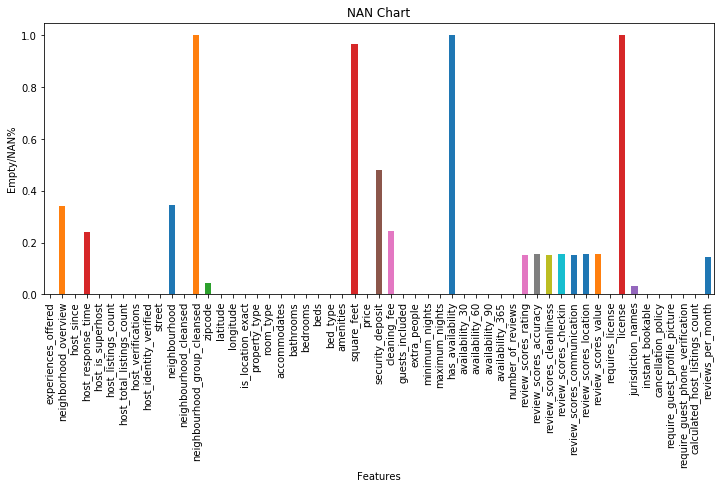

In [5]:
# Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model
# because we have not analysed the behavior and relationship with other variables correctly. 
# It can lead to wrong prediction. To find missing and NAN values , first

# 1. Check columns with nan/empty values
percentage_missing_data = listings.isnull().sum() / listings.shape[0]
ax = percentage_missing_data.plot(kind = 'bar', figsize = (12, 5))
ax.set_xlabel('Features')
ax.set_ylabel('Empty/NAN%')
ax.set_title('NAN Chart')
plt.show()

In [6]:
# We can remove columns with more than 30% empty or nan values as these features effect the overall composition of the data
# and might lead to unwanted and wrong bias

empty_cols = ['neighbourhood', 'neighbourhood_group_cleansed','neighborhood_overview',
              'square_feet', 'has_availability', 'license','jurisdiction_names','experiences_offered' ]

listings.drop(empty_cols, axis=1, inplace=True)


Index(['host_response_time', 'host_is_superhost', 'host_verifications',
       'host_identity_verified', 'street', 'neighbourhood_cleansed', 'zipcode',
       'is_location_exact', 'property_type', 'room_type', 'bed_type',
       'amenities', 'requires_license', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification'],
      dtype='object')


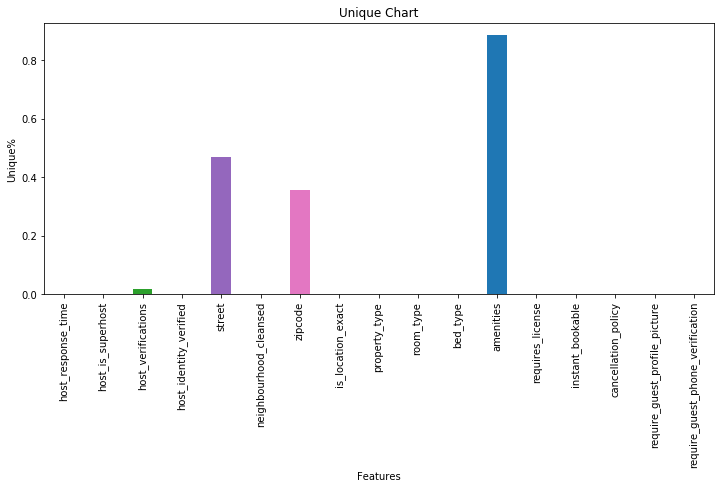

In [7]:
# Check for unique values on categroical data

categories = listings.columns[listings.dtypes == 'object']
print(categories)
percentage_unique = listings[categories].nunique() / listings.shape[0]
ax = percentage_unique.plot(kind = 'bar', figsize = (12, 5))
ax.set_xlabel('Features')
ax.set_ylabel('Unique%')
ax.set_title('Unique Chart')
plt.show()

In [8]:
# We can remove unqiue values as they will have weak correlation with price and also , we dont need streer and zipcode as we 
# have lat/long to work with. 

unique_cols = ['street','zipcode']
listings.drop(unique_cols, axis=1, inplace=True)

In [9]:
# As machine learning models requrie data in number/float values so replacing t/f with 1/0 to all boolean values
bool_attributes = ['host_is_superhost', 'host_identity_verified', 'is_location_exact', 
                    'requires_license','instant_bookable', 'require_guest_profile_picture', 
                   'require_guest_phone_verification']

replace_dict = {'f' : 0 , 't' : 1}

for cols in bool_attributes : 
    listings[cols]=listings[cols].replace(replace_dict)

In [10]:
# Converting host_since to days till today , as Model will predict with only numbers and we can find the correlation after
# converting it to numbers 

import datetime     
now = datetime.date.today()
today = pd.Timestamp(now)
#listings["host_since"].corr(listings['price'])

listings['host_since'] = pd.to_datetime(listings['host_since'])
listings['now'] = today
listings['host_since'] = listings['now'].sub(listings['host_since'], axis=0).dt.days

del  listings['now']

In [11]:
# Converting host_response_time to number , , as Model will predict with only numbers and we can find the correlation after
# converting it to numbers 

replace_dict = {'within an hour' : 1 , 'within a few hours' : 2 , 'within a day' : 3 ,  'a few days or more': 4}
listings['host_response_time'].replace(replace_dict , inplace=True)

In [12]:
# changing host verification documents to number of records need for verification for better data processing

listings['host_verifications'] = listings.host_verifications.apply(lambda x: x.strip('[]').split(','))
listings['number_of_documents'] = listings['host_verifications'].str.len()

listings['amenities'] = listings.amenities.apply(lambda x: x.strip('{}').split(','))
listings['number_of_amenities'] = listings['amenities'].str.len()

listings['number_of_amenities'].head(5)

del listings['host_verifications']
del listings['amenities']

In [13]:
from geopy.distance import vincenty

def distance_calc (row):
    start = (row['latitude'], row['longitude'])
    stop = (52.379189, 4.899431)

    return vincenty(start, stop).meters

# Calculating the distance from amsterdam central using lat/long as per my observation Amsterdam Central is centermost place
# in amsterdam with station , so travelers might prefer airbnb closer to the area so it might effect the price

listings['distance_from_central'] = listings.apply (lambda row: distance_calc (row),axis=1)

del listings['latitude']
del listings['longitude']

In [14]:
# Converted property type and room type to unique number with pandas category , thus converting string values to a number

for cols in ['property_type','room_type','bed_type','neighbourhood_cleansed','cancellation_policy']:
    listings[cols] = listings[cols].astype('category')
    listings[cols] = listings[cols].cat.codes


KeyboardInterrupt: 

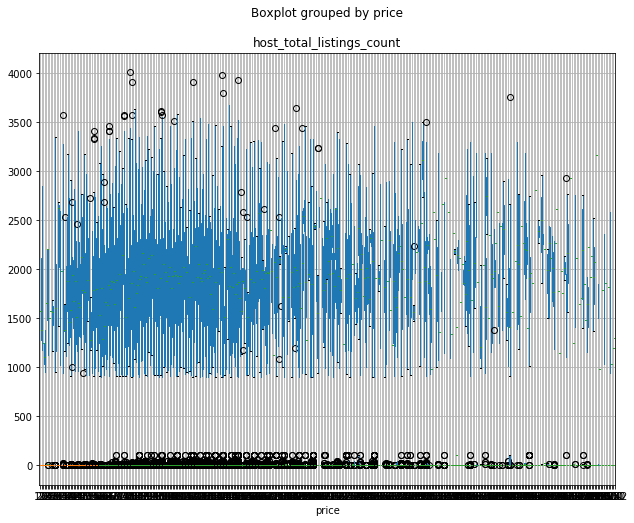

In [18]:
fig, ax = plt.subplots(figsize=(10,8))
for cols in listings:
    listings.boxplot(column=[cols], by='price', ax=ax)
plt.show()

In [18]:
# Above box-plots helps us analyze if we have anomolies or outliers in our dataset , as outliers effects the mean and overall
# distribution of the feature and thus effects the errors

# As per the plots we could figure out that 2 airbnbs with 13 and 17 have price not according to trend so we can remove these

listings.drop(listings[listings['accommodates'] == 13].index,inplace=True)
listings.drop(listings[listings['accommodates'] == 17].index,inplace=True)

In [19]:
# removing $ from currency features

listings['price'] = listings['price'].astype(str).str.replace('\$|,', '')
listings['price'] = pd.to_numeric(listings['price'])

listings['extra_people'] = listings['extra_people'].astype(str).str.replace('\$|,', '')
listings['extra_people'] = pd.to_numeric(listings['extra_people'])

In [20]:
# We need to handle NAN values as it effects the overall disribution of the feature ( mean, mode , median ) and thus effects 
# the absolute and mean errors. Also we can collect correlation and model cannot fit with NAN values, so we need to handle it

listings.isna().any()
listings.isna().sum()

host_since                             3
host_response_time                  3646
host_is_superhost                      3
host_listings_count                    3
host_total_listings_count              3
host_identity_verified                 3
neighbourhood_cleansed                 0
is_location_exact                      0
property_type                          0
room_type                              0
accommodates                           0
bathrooms                             18
bedrooms                              11
beds                                  17
bed_type                               0
price                                  0
security_deposit                    7303
cleaning_fee                        3713
guests_included                        0
extra_people                           0
minimum_nights                         0
maximum_nights                         0
availability_30                        0
availability_60                        0
availability_90 

In [22]:
# Handling NAN values
# 1. Repplace with MEAN : features like ratings can be replaced with mean
# 2. Replace with MODE : features like bathrooms can be replaced with most common values in the dataset for that feature
# 3. Replace with 0 : features like security depostit and cleaning fee if NAN , could be no fee or deposit thus replacing with 0

replace_with_mean = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_value',
                     'host_response_time','host_since','availability_30', 
                      'availability_60', 'availability_90','review_scores_checkin','review_scores_location']

replace_with_mode = ['bathrooms','beds','bedrooms','review_scores_communication',
                     'calculated_host_listings_count','host_listings_count','requires_license']

replace_with_zero = ['host_is_superhost','host_total_listings_count','host_identity_verified','security_deposit'
                     ,'cleaning_fee','reviews_per_month']


for cols in replace_with_mean:
    listings[cols] = listings[cols].fillna(listings[cols].mean())
for cols in replace_with_mode:
    listings[cols] = listings[cols].fillna(listings[cols].mode()[0])
for cols in replace_with_zero:
    listings[cols] = listings[cols].fillna(0)



In [23]:
# AFter handling NAN values

listings.isna().any()
listings.isna().sum()

host_since                          0
host_response_time                  0
host_is_superhost                   0
host_listings_count                 0
host_total_listings_count           0
host_identity_verified              0
neighbourhood_cleansed              0
is_location_exact                   0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           0
bedrooms                            0
beds                                0
bed_type                            0
price                               0
security_deposit                    0
cleaning_fee                        0
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
availability_30                     0
availability_60                     0
availability_90                     0
availability_365                    0
number_of_re

,host_since,host_response_time,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,is_location_exact,property_type,room_type,...,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,number_of_documents,number_of_amenities,distance_from_central
host_since,1.000000,0.081327,0.060071,0.046814,0.046814,0.261627,0.009478,0.094728,-0.029718,-0.046036,...,NaN,-0.149468,0.120808,0.179023,0.210962,0.018175,-0.047298,0.170375,-0.007870,-0.086265
host_response_time,0.081327,1.000000,-0.089302,-0.115799,-0.115798,-0.027158,0.019018,-0.015517,-0.001927,-0.074000,...,NaN,-0.333308,-0.064869,0.019268,-0.007746,-0.136321,-0.213557,-0.030714,-0.113464,0.008088
host_is_superhost,0.060071,-0.089302,1.000000,-0.041898,-0.041891,0.107206,-0.020632,0.032884,0.012420,0.046159,...,NaN,-0.011564,0.069410,0.033079,0.029933,-0.043611,0.219782,0.077301,0.174494,-0.053771
host_listings_count,0.046814,-0.115799,-0.041898,1.000000,0.999999,0.109962,-0.026611,0.059722,-0.036846,-0.042618,...,NaN,0.209239,0.117476,-0.013999,0.056574,0.964989,-0.028291,0.050577,-0.000420,-0.050789
host_total_listings_count,0.046814,-0.115798,-0.041891,0.999999,1.000000,0.109983,-0.026606,0.059722,-0.036838,-0.042622,...,NaN,0.209246,0.117471,-0.013997,0.056576,0.964988,-0.028283,0.050620,-0.000407,-0.050780
host_identity_verified,0.261627,-0.027158,0.107206,0.109962,0.109983,1.000000,-0.006474,0.018173,-0.018024,-0.018984,...,NaN,-0.040409,0.137797,0.062003,0.080636,0.108964,0.044536,0.690843,0.113655,-0.055605
neighbourhood_cleansed,0.009478,0.019018,-0.020632,-0.026611,-0.026606,-0.006474,1.000000,0.007397,0.036509,-0.034064,...,NaN,-0.038212,-0.020263,0.012872,-0.006985,-0.022591,-0.080131,-0.006510,-0.000748,0.143490
is_location_exact,0.094728,-0.015517,0.032884,0.059722,0.059722,0.018173,0.007397,1.000000,0.028797,-0.049371,...,NaN,0.006049,0.016767,0.034391,0.049678,0.063486,-0.008545,0.000944,0.067299,-0.050226
property_type,-0.029718,-0.001927,0.012420,-0.036846,-0.036838,-0.018024,0.036509,0.028797,1.000000,0.092480,...,NaN,0.024815,0.002457,-0.019717,-0.023321,-0.041126,0.012077,-0.021878,0.052680,0.142291
room_type,-0.046036,-0.074000,0.046159,-0.042618,-0.042622,-0.018984,-0.034064,-0.049371,0.092480,1.000000,...,NaN,0.117294,-0.059057,0.028221,0.019230,-0.044336,0.317042,-0.015013,-0.075918,0.091661


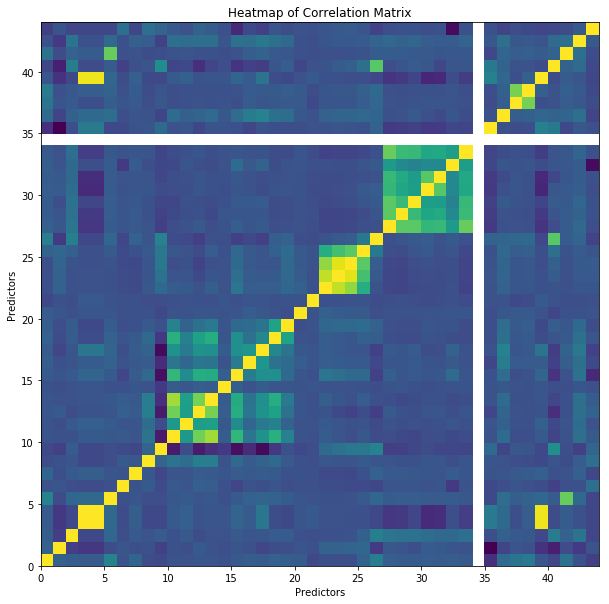

In [24]:
# We create correlation heat matrix and report to check the correlation between features

corr_matrix = listings.corr()
plt.figure(figsize=(10, 10))
plt.pcolor(corr_matrix)
plt.xlabel('Predictors')
plt.ylabel('Predictors')
plt.title('Heatmap of Correlation Matrix')



corr_matrix



c:\users\akshayk\appdata\local\programs\python\python36\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


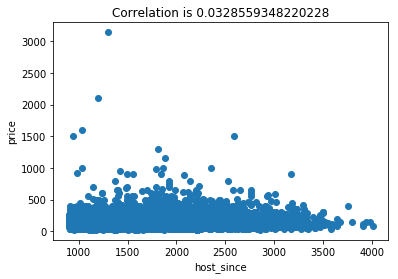

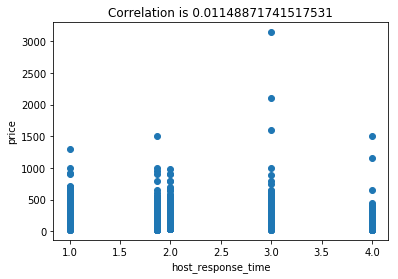

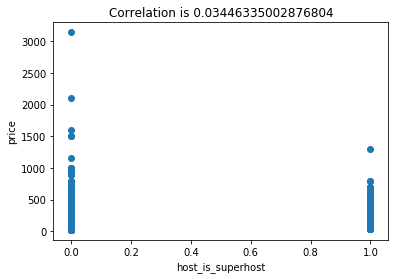

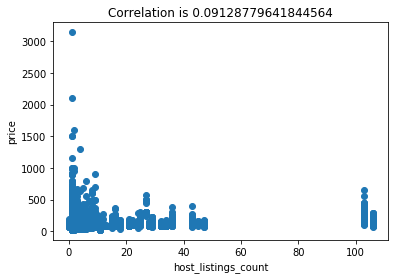

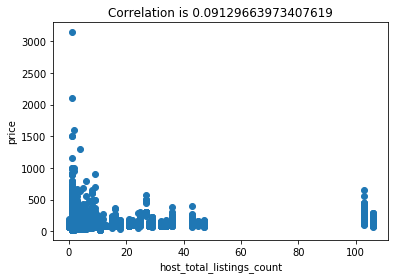

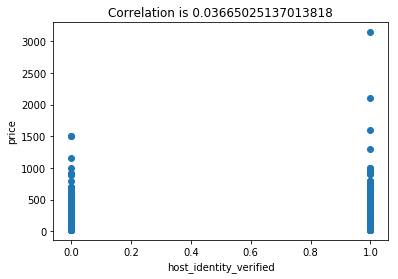

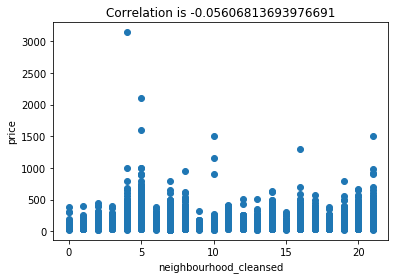

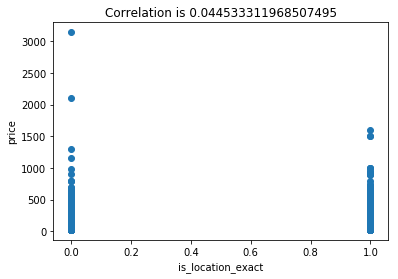

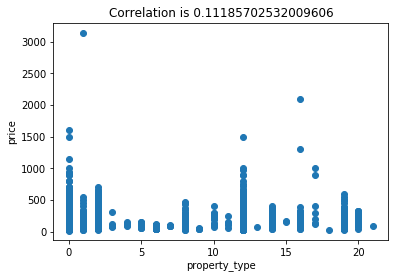

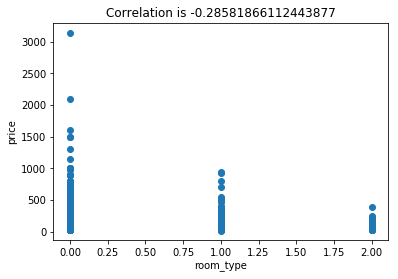

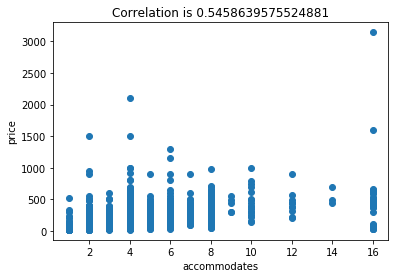

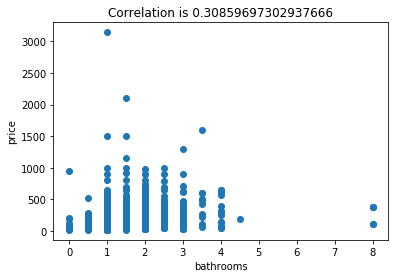

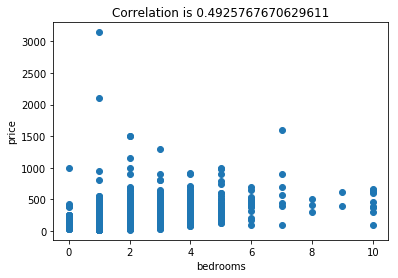

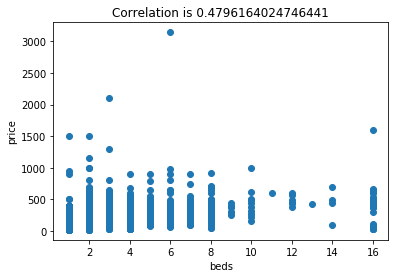

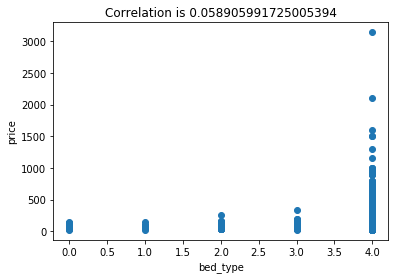

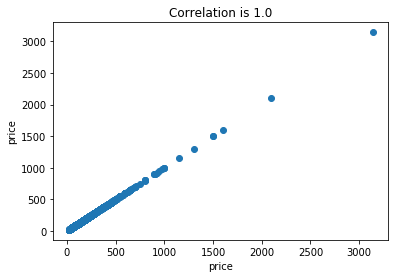

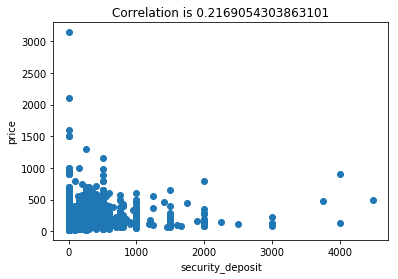

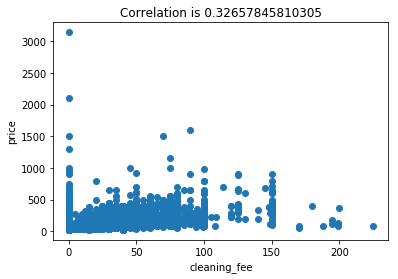

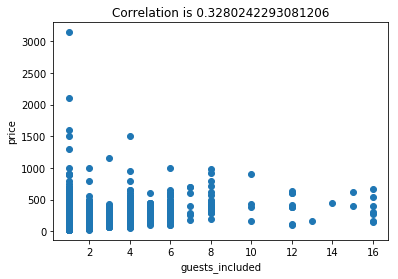

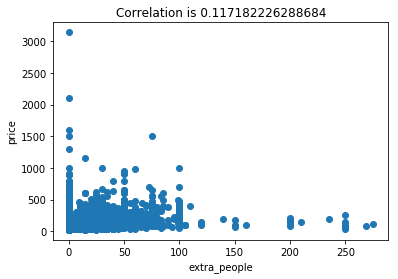

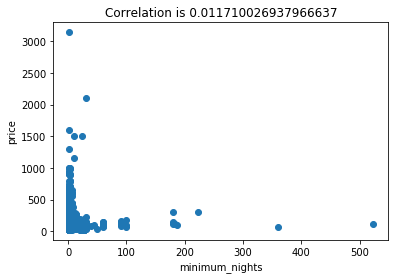

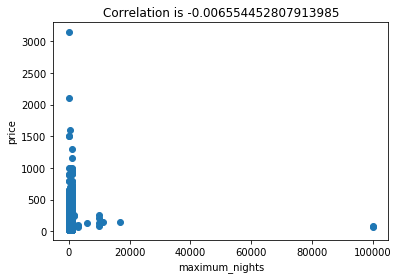

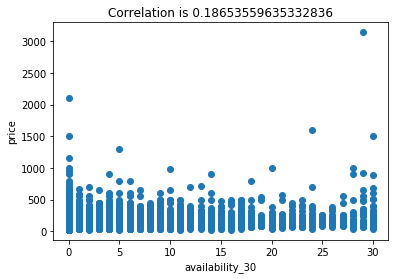

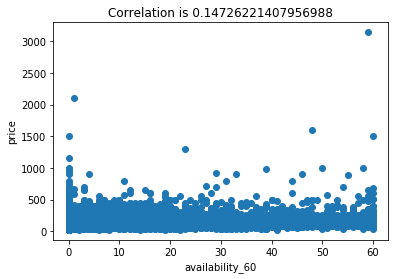

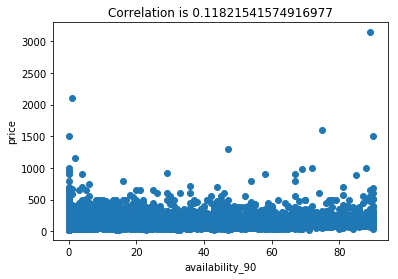

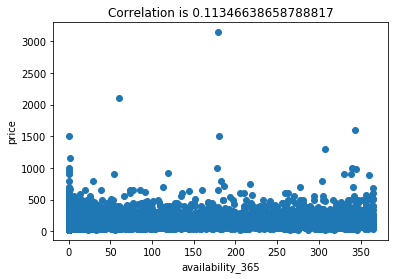

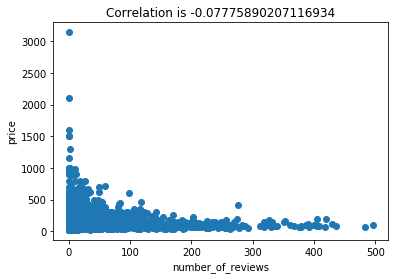

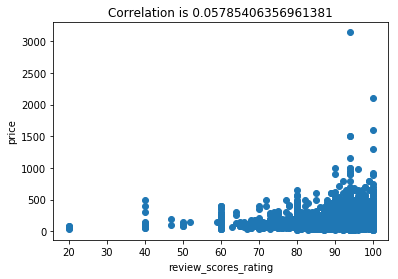

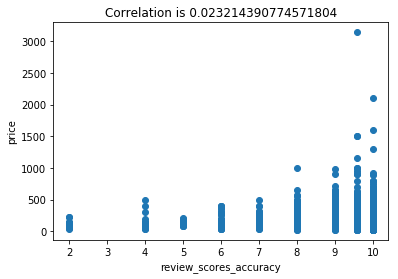

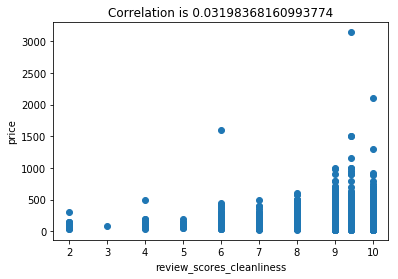

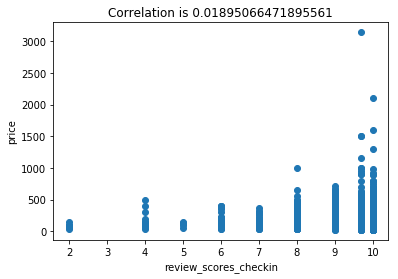

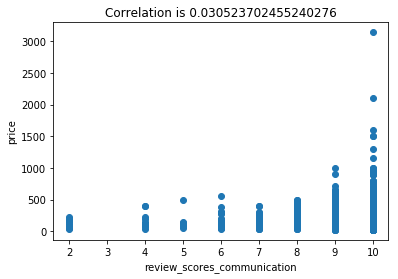

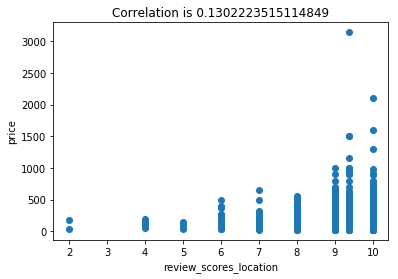

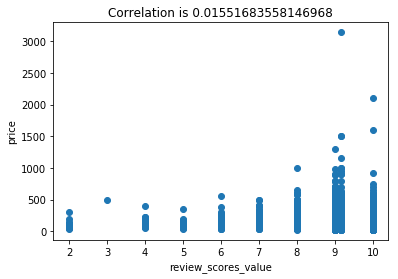

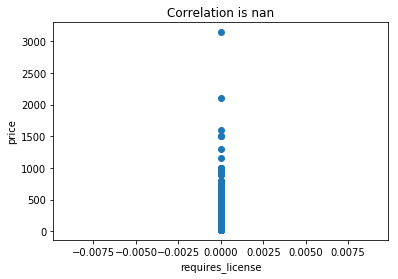

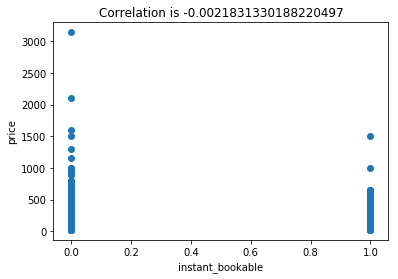

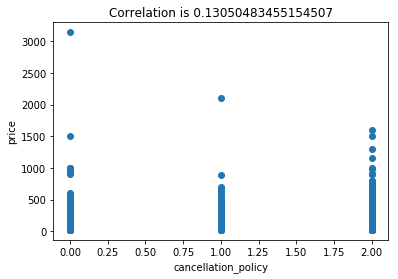

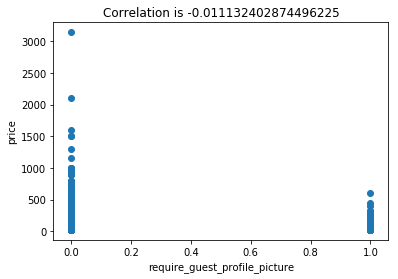

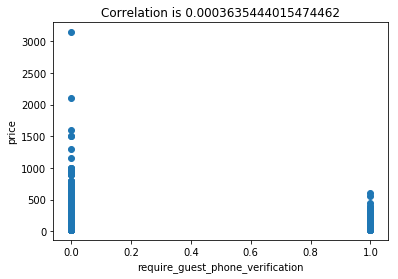

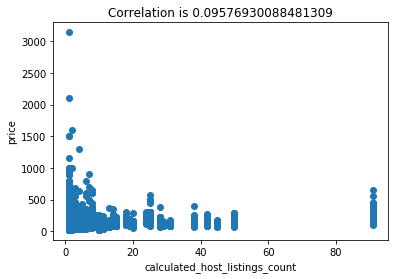

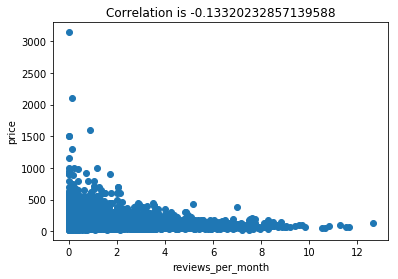

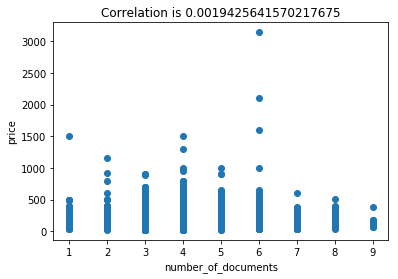

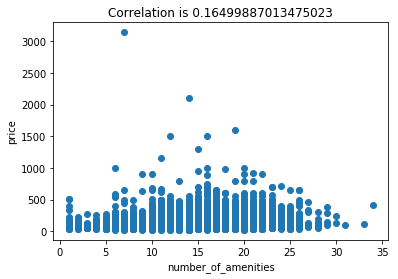

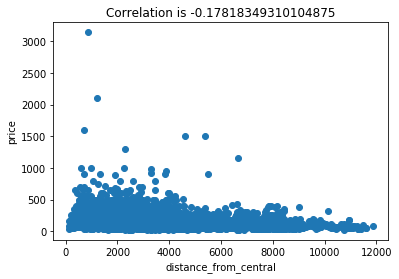

In [25]:
# We plot a scatter-plot to study relation between features and price

for cols in listings: 
    fig, ax = plt.subplots()

    ax.scatter(listings[cols], listings['price'])
    # set a title and labels
    corr = listings[cols].corr(listings['price'])
    ax.set_title('Correlation is '+ str(corr) )
    ax.set_xlabel(cols)
    ax.set_ylabel('price')

In [26]:
# After studying the correlation heat map , We can remove features which are correlated with each other as same features will 
# have the same effect on the price, So reducing the features which have same effect on price will not effect the model 
# performance and reduce the model complexity

similar_and_lesscorrelated_columns = ['calculated_host_listings_count','host_listings_count', 'availability_30', 
                      'availability_60', 'availability_90', 'requires_license'
                      ,'review_scores_checkin','host_response_time','cancellation_policy',
                     'review_scores_communication','review_scores_location','review_scores_accuracy']
listings_processed = listings.drop(similar_and_lesscorrelated_columns, axis=1)
listings.drop(listings[listings['bathrooms'] == 8].index,inplace=True)
#listings.drop(listings[listings['accommodates'] == 17].index,inplace=True)

#listings.drop(listings[listings['bathrooms'] == 8].index,inplace=True)


In [27]:
# Shuffle the data to ensure a good distribution for the training and testing sets

from sklearn.utils import shuffle
listings_processed = shuffle(listings_processed)

In [28]:
# Split the data into test and training sets

y = listings_processed['price']
X = listings_processed.drop('price', axis = 1)

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)  
train_X = np.array(train_X)
test_X = np.array(test_X)
train_y = np.array(train_y)
test_y = np.array(test_y)

train_X.shape, test_X.shape

((11384, 31), (3795, 31))

In [29]:
# As this is Regression problem , I am using: 
# 1. Random Forest Regressor : As with multiple features , Random forest works well as it has the capability of capturing
# different feature interactions using Information / Entropy Gain
#
# 2. Linear Regression : Its the most common model use with regression , we have removed inter-correlated features and preproce-
# ssed the data well so linear regression is expected to do well

# 3. SVR : We usually use Support Vectors with Classification with multidimensional data, I am using Support Vector regression
# here to measure how my models peform in comparison with each other

# 4. XGBooster : XGBooster implements gradient boossting thus optimizing the model by minimizing the loss function.


from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.svm import SVR
from xgboost import XGBRegressor


# Creaint a pipeline for Imputer and StandardScalar
pipeline_RF = make_pipeline(Imputer(), StandardScaler(),
                               RandomForestRegressor(n_estimators=20,random_state=0))

pipeline_LR = make_pipeline(Imputer(), StandardScaler(),
                               linear_model.LinearRegression())

pipeline_SVR = make_pipeline(Imputer(), StandardScaler(),
                               SVR())

pipeline_XGB = make_pipeline(Imputer(), StandardScaler(), 
                                XGBRegressor(random_state = 42))

pipeline_RF.fit(train_X, train_y)

pipeline_LR.fit(train_X, train_y)

pipeline_SVR.fit(train_X, train_y)

pipeline_XGB.fit(train_X, train_y)

c:\users\akshayk\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[15:38:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('xgbregressor', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_by...lpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1))])

In [46]:
#function to return MSE and RMSE of the model. Lower the mse better the model perfoemance

from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

def evaluate_model(model, predict_set, evaluate_set):
    predictions = model.predict(predict_set)
    print("Median Absolute Error: " + str(round(median_absolute_error(predictions, evaluate_set), 2))) 
    RMSE = round(sqrt(mean_squared_error(predictions, evaluate_set)), 2)
    print("RMSE: " + str(RMSE))

In [48]:
# We are able to evaluate the model perfomance and return their MSE and RMSE.

print("Random Forest")
evaluate_model(pipeline_RF, test_X, test_y)
print("Linear Regression")
evaluate_model(pipeline_LR, test_X, test_y)
print("SVR")
evaluate_model(pipeline_SVR, test_X, test_y)
print("XG Boost")
evaluate_model(pipeline_XGB, test_X, test_y)

importances = pipeline_RF.steps[2][1].feature_importances_
feature_importances = pd.DataFrame({"feature":X.columns.values, "importance":importances})
feature_importances.sort_values("importance", ascending=False).head(22)

Random Forest
Median Absolute Error: 20.2
RMSE: 55.41
Linear Regression
Median Absolute Error: 24.33
RMSE: 55.72
SVR
Median Absolute Error: 22.34
RMSE: 66.63
XG Boost
Median Absolute Error: 20.64
RMSE: 52.32


,feature,importance
8,accommodates,0.267271
30,distance_from_central,0.076150
19,availability_365,0.073937
18,maximum_nights,0.056984
9,bathrooms,0.048837
0,host_since,0.041589
17,minimum_nights,0.040543
14,cleaning_fee,0.039222
10,bedrooms,0.032958
16,extra_people,0.029045


In [49]:
# R squared score for the Linear Regression Model is 50%

score = pipeline_LR.score( test_X, test_y)
score


0.500618880832064

In [33]:
# Lets run PCA with feature to check if it increases the performance. We use PCA to reduce features dimensionality

from sklearn.decomposition import PCA

for i in range(5,15):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(X)
    # I am using Random Forest Regressor , Linear Regression , SVR and XGBooster to train data

    train_X, test_X, train_y, test_y = train_test_split(principalComponents, y, random_state = 0)  
    train_X = np.array(train_X)
    test_X = np.array(test_X)
    train_y = np.array(train_y)
    test_y = np.array(test_y)
    # Creaint a pipeline for Imputer and StandardScalar
    pipeline_RF = make_pipeline(Imputer(), StandardScaler(),
                                   RandomForestRegressor(n_estimators=20,random_state=0))

    pipeline_LR = make_pipeline(Imputer(), StandardScaler(),
                                   linear_model.LinearRegression())

    pipeline_SVR = make_pipeline(Imputer(), StandardScaler(),
                                   SVR())

    pipeline_XGB = make_pipeline(Imputer(), StandardScaler(), 
                                    XGBRegressor(random_state = 42))

    pipeline_RF.fit(train_X, train_y)

    pipeline_LR.fit(train_X, train_y)

    pipeline_SVR.fit(train_X, train_y)

    pipeline_XGB.fit(train_X, train_y)
    
    print("Random Forest")
    evaluate_model(pipeline_RF, test_X, test_y)
    print("Linear Regression")
    evaluate_model(pipeline_LR, test_X, test_y)
    print("SVR")
    evaluate_model(pipeline_SVR, test_X, test_y)
    print("XG Boost")
    evaluate_model(pipeline_XGB, test_X, test_y)

[15:43:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Random Forest
Median Absolute Error: 36.2
RMSE: 77.65
Linear Regression
Median Absolute Error: 36.5
RMSE: 74.9
SVR
Median Absolute Error: 28.9
RMSE: 77.48
XG Boost
Median Absolute Error: 34.31
RMSE: 73.56
[15:43:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Random Forest
Median Absolute Error: 34.15
RMSE: 76.1
Linear Regression
Median Absolute Error: 35.97
RMSE: 74.27
SVR
Median Absolute Error: 28.51
RMSE: 76.99
XG Boost
Median Absolute Error: 33.8
RMSE: 72.49
[15:43:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Random Forest
Median Absolute Error: 32.0
RMSE: 71.74
Linear Regression
Median Absolute Error: 3

In [34]:
# As we can conclude PCA is not able to improve mean -square so we are not going to use it

In [35]:
# Using k-cross validation to improve performace
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
cv = KFold(n_splits=10, random_state=42, shuffle=False)
scaler = MinMaxScaler(feature_range=(0, 1))

y = listings_processed['price']
X = listings_processed.drop('price', axis = 1)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    train_X, test_X, train_y, test_y = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    
    pipeline_RF = make_pipeline(Imputer(), StandardScaler(),
                                   RandomForestRegressor(n_estimators=20,random_state=0))

    pipeline_LR = make_pipeline(Imputer(), StandardScaler(),
                                   linear_model.LinearRegression())

    pipeline_SVR = make_pipeline(Imputer(), StandardScaler(),
                                   SVR())

    pipeline_XGB = make_pipeline(Imputer(), StandardScaler(), 
                                    XGBRegressor(random_state = 42))

    pipeline_RF.fit(train_X, train_y)

    pipeline_LR.fit(train_X, train_y)

    pipeline_SVR.fit(train_X, train_y)

    pipeline_XGB.fit(train_X, train_y)
    
    print("Random Forest")
    evaluate_model(pipeline_RF, test_X, test_y)
    print("Linear Regression")
    evaluate_model(pipeline_LR, test_X, test_y)
    print("SVR")
    evaluate_model(pipeline_SVR, test_X, test_y)
    print("XG Boost")
    evaluate_model(pipeline_XGB, test_X, test_y)

Train Index:  [ 1518  1519  1520 ... 15176 15177 15178] 

Test Index:  [   0    1    2 ... 1515 1516 1517]
[15:45:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Random Forest
Median Absolute Error: 20.72
RMSE: 50.62
Linear Regression
Median Absolute Error: 24.38
RMSE: 49.65
SVR
Median Absolute Error: 22.55
RMSE: 59.7
XG Boost
Median Absolute Error: 21.3
RMSE: 47.21
Train Index:  [    0     1     2 ... 15176 15177 15178] 

Test Index:  [1518 1519 1520 ... 3033 3034 3035]
[15:45:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Random Forest
Median Absolute Error: 19.75
RMSE: 65.47
Linear Regression
Median Absolute Error: 24.38
RMSE: 68.82
SVR
Median Absolute Error: 21.65
RMSE: 82.52
XG Boost
Median Absolute Error: 20.0
RMSE: 63.13
Train Index:  [    0     1     2 ... 15176 

In [36]:
# with k-fold validation mse is reduced between 1-5 depending on Model Used

In [37]:
# XG BOOST performs the best with K-fold cross validation and with general split Random Forest Regressor performs best for Predicting AirBNB price

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import operator
import collections
import re
import nltk
listings_1 = pd.read_excel(r"C:\Users\akshayk\Downloads\Listings Data.xlsx")

cv = CountVectorizer(stop_words='english', analyzer='word', ngram_range=(1,2))
txt_fitted = cv.fit(listings_1['amenities'].values.astype('U'))
txt_transformed = txt_fitted.transform(listings_1['summary'].values.astype('U'))

tf = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word', stop_words= 'english')
txt_fitted = tf.fit(listings_1['amenities'].values)
txt_transformed = txt_fitted.transform(listings_1['amenities'].values)

_idf = tf.idf_
feature_names = np.array(tf.get_feature_names())
sorted_by_idf = np.argsort(_idf)
_dict = dict(zip(txt_fitted.get_feature_names(), _idf))
_sorted = sorted(_dict.items(), key = lambda x: x[1])
_sorted_dict = collections.OrderedDict(_sorted)
_sorted_dict

OrderedDict([('internet', 1.018280829491076),
             ('wireless', 1.0209006543193644),
             ('heating', 1.0280560783957184),
             ('kitchen', 1.0759997748242804),
             ('essentials', 1.0835620567077884),
             ('tv', 1.2223863122374146),
             ('friendly', 1.2507593770655345),
             ('detector', 1.2730995024496967),
             ('smoke', 1.2834532731087984),
             ('washer', 1.3004768374709181),
             ('dryer', 1.3374476149871477),
             ('shampoo', 1.5085884863676342),
             ('hangers', 1.5673526425311495),
             ('family', 1.5752836381500996),
             ('kid', 1.5752836381500996),
             ('laptop', 1.589316059902723),
             ('workspace', 1.589316059902723),
             ('iron', 1.6086200584176913),
             ('hair', 1.6227631861424112),
             ('cable', 1.7452694164990925),
             ('en', 1.8771168901481237),
             ('missing', 1.8771168901481237),
           

In [39]:
# I did a research on AirBNB preffered ameneties and came up an rating based ameneties with tf-idf values

keyword_ratings = {
    'internet':2,
    'coffee' : 2,
    'bicycle' :3,
    'heating':1,
    'tv':1,
    'pet' : 2,
    'parking' : 2,
    'washer':2,
    'carbon':2,
    'elevator':1,
    'breakfast':3,
    'fireplace':3,
    'tub':2,
    'pool':4,
    'cable':1,
    'bathtub':3,
    'workspace':1,
    'iron':1,
    'kitchen':2,
    'gym':3,
    'doorman':2
    
}

# Creating tokens and removing stop_Words

def tokenization(text):
    tokens = re.split(r'\W+', text)
    return tokens
listings_1['amenities_token'] = listings_1['amenities'].apply(lambda x: tokenization(x))
# pp(df['amenities_token'])
stopWord = nltk.corpus.stopwords.words('english')

def stopWords(tokenized_list):
    text_out = [word for word in tokenized_list if word not in stopWord]
    return text_out

listings_1['amenities_token_'] = listings_1['amenities_token'].apply(lambda x: stopWords(x))



In [40]:
# creating a ameneties_rating feature to add into dataset and find correlation

def check_word(value_list):
    vl = 0
    added_words = []
    for word in value_list :
        word = word.lower()
        if word in keyword_ratings:
            
            if word not in added_words :
                added_words.append(word)
                vl += keyword_ratings[word]
            
    return vl

listings_1['ameneties_rating'] = listings_1['amenities_token_'].apply(lambda x: check_word(x))

listings_1['ameneties_rating'].corr(listings_1['price'])

0.16799778606617313

In [41]:
# Correlation came upto 1.6 which is weak but on more analysis with time we can come up with better rating set for ameneties
# and summary

In [42]:
listings_processed['ameneties_rating'] = listings_1['ameneties_rating']
y = listings_processed['price']

X = listings_processed.drop('price', axis = 1)

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)  
train_X = np.array(train_X)
test_X = np.array(test_X)
train_y = np.array(train_y)
test_y = np.array(test_y)

train_X.shape, test_X.shape

((11384, 32), (3795, 32))

In [43]:

# Creaint a pipeline for Imputer and StandardScalar
pipeline_RF = make_pipeline(Imputer(), StandardScaler(),
                               RandomForestRegressor(n_estimators=20,random_state=0))

pipeline_LR = make_pipeline(Imputer(), StandardScaler(),
                               linear_model.LinearRegression())

pipeline_SVR = make_pipeline(Imputer(), StandardScaler(),
                               SVR())

pipeline_XGB = make_pipeline(Imputer(), StandardScaler(), 
                                XGBRegressor(random_state = 42))

pipeline_RF.fit(train_X, train_y)

pipeline_LR.fit(train_X, train_y)

pipeline_SVR.fit(train_X, train_y)

pipeline_XGB.fit(train_X, train_y)


print("Random Forest")
evaluate_model(pipeline_RF, test_X, test_y)
print("Linear Regression")
evaluate_model(pipeline_LR, test_X, test_y)
print("SVR")
evaluate_model(pipeline_SVR, test_X, test_y)
print("XG Boost")
evaluate_model(pipeline_XGB, test_X, test_y)

[15:48:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Random Forest
Median Absolute Error: 20.2
RMSE: 55.41
Linear Regression
Median Absolute Error: 24.33
RMSE: 55.72
SVR
Median Absolute Error: 22.34
RMSE: 66.63
XG Boost
Median Absolute Error: 20.64
RMSE: 52.32


In [45]:
# With tokenization and Rating based analysis RMSE is reduced